# Что я сделала для цг 
### Код не запускать!!!!!!!

1. с помощью гугл формс у нас сформировалась табличка с данными 
2. я скопировала данные из таблички, привязанной к гугл формс в другую табличку, переименовав столбцы чтобы названия были уникальными и короткими
3. скачала в формате TSV
	1. почему не csv? потому что у нас много кто писал ассоциации через запятую и если бы мы сохранили в формате csv то столбцы бы поплыли. 
	2. Но я тут вообщето собираюсь работать с **pandas**, а pandas работает только с csv файлами. Что же делать?
4. Открываем наш tsv файл в ББЭдит и сейчас будем делать **регулярные выражения**. Находим какой-нибудь знак препинания, которого нет ни в одном ответе
	1.  find , replace ~
	2. find \t replace ,	
	3. save as csv 
	4. проверить в гугол таблицах что все работает нормально и  ничего не поехало
	5. Сохраняем файл в то же место где питон файлик, называем scarlet.csv

## Питончик
Импортирую библиотеки **pandas** **natasa**  **wordcloud** и делаю все как написано у наташи в гитхабе чтоб она заваьотала как надо

In [ ]:
pip install nltk pandas natasha razdel wordcloud matplotlib 


# !!!! Если хотите запустить код, не забудьте сментить пути до файлов

In [70]:
import pandas as pd
scarlet = pd.read_csv("/Users/anyamelnikova/Desktop/vs/python/digitallit/scarlet.csv")
from razdel import tokenize
from wordcloud import WordCloud
import colorsys
from matplotlib import colors
import numpy as np
from nltk.probability import FreqDist
from natasha import MorphVocab, Doc, NewsMorphTagger, NewsEmbedding, NamesExtractor, Segmenter
# из гитхаба наташи копируем все что нужно для работы чтобы запускалась

emb = NewsEmbedding()
morph_tagger = NewsMorphTagger(emb)
morph_vocab = MorphVocab()
names_extractor = NamesExtractor(morph_vocab)
segmenter = Segmenter()

### Функция 1. Записываем ассоциации в файлики

In [71]:
def sepfunc(column, wordfile): 
    lst = []
    for i in range(len(scarlet[column])):
        lst.append(list(map(str, scarlet[column][i].split("~"))))
    f = open(wordfile, 'w')
    for  i in range(len(lst)): 
        lst[i] += " "     
        for j in range(len(lst[i])):
            f.writelines(str(lst[i][j]))
    f.close() 
    return lst


### Выполняем функцию 1 и открвыаем все наше великолепие на почитать

In [72]:
sepfunc("ideas1", '/Users/anyamelnikova/Desktop/vs/python/digitallit/ wordies_1')
sepfunc("ideas2", '/Users/anyamelnikova/Desktop/vs/python/digitallit/ wordies_2')
sepfunc("ideas3", '/Users/anyamelnikova/Desktop/vs/python/digitallit/ wordies_3')
sepfunc("ideas4", '/Users/anyamelnikova/Desktop/vs/python/digitallit/ wordies_4')
sepfunc("ideas5", '/Users/anyamelnikova/Desktop/vs/python/digitallit/ wordies_5')
sepfunc("ideas6", '/Users/anyamelnikova/Desktop/vs/python/digitallit/ wordies_6')
sepfunc("ideas7", '/Users/anyamelnikova/Desktop/vs/python/digitallit/ wordies_7')
sepfunc("ideas8", '/Users/anyamelnikova/Desktop/vs/python/digitallit/ wordies_8')
sepfunc("ideas9", '/Users/anyamelnikova/Desktop/vs/python/digitallit/ wordies_9')

wordfile1 = open('/Users/anyamelnikova/Desktop/vs/python/digitallit/ wordies_1', 'r')
wordfile2 = open('/Users/anyamelnikova/Desktop/vs/python/digitallit/ wordies_2', 'r')
wordfile3 = open('/Users/anyamelnikova/Desktop/vs/python/digitallit/ wordies_3', 'r')
wordfile4 = open('/Users/anyamelnikova/Desktop/vs/python/digitallit/ wordies_4', 'r')
wordfile5 = open('/Users/anyamelnikova/Desktop/vs/python/digitallit/ wordies_5', 'r')
wordfile6 = open('/Users/anyamelnikova/Desktop/vs/python/digitallit/ wordies_6', 'r')
wordfile7 = open('/Users/anyamelnikova/Desktop/vs/python/digitallit/ wordies_7', 'r')
wordfile8 = open('/Users/anyamelnikova/Desktop/vs/python/digitallit/ wordies_8', 'r')
wordfile9 = open('/Users/anyamelnikova/Desktop/vs/python/digitallit/ wordies_9', 'r')


### Функция 2 выделаем все существительные и приланательные (с помощью наташи)

#### ведь там как будто бы весь нужный нам смысл. Мы сначала разбиваем все на токены, потом


In [73]:

def nounadj(wordfile):
    lst = []
    words = wordfile.readline()
    tokens = list(tokenize(words))
    doc = Doc(words)
    doc.segment(segmenter)
    doc.tag_morph(morph_tagger)
    for token in doc.tokens:
        if token.pos == "NOUN" or token.pos == 'ADJ':
            token.lemmatize(morph_vocab)
            lst.append(token.lemma) 

    for item in lst:
        if item.isalpha() == False:
            lst.remove(item)
        else:
            item.lower()
    return lst


nounadj1 = nounadj(wordfile1)
nounadj2 = nounadj(wordfile2)
nounadj3 = nounadj(wordfile3)
nounadj4 = nounadj(wordfile4)
nounadj5 = nounadj(wordfile5)
nounadj6 = nounadj(wordfile6)
nounadj7 = nounadj(wordfile7)
nounadj8 = nounadj(wordfile8)
nounadj9 = nounadj(wordfile9)
print(nounadj1)
print(nounadj2)
print(nounadj3)
print(nounadj4)
print(nounadj5)
print(nounadj6)
print(nounadj7)
print(nounadj8)
print(nounadj9)



['рамка', 'любовь', 'огонь', 'ощущение', 'причастность', 'похожий', 'аленький', 'цветочек', 'сказочный', 'кровь', 'одеяло', 'плед', 'матовый', 'мягкий', 'клубника', 'красный', 'шапочка', 'оранжевый', 'приятный', 'морковь', 'осень', 'свитер', 'томатный', 'суп', 'гневный', 'малый', 'неестественный', 'детский', 'книжка', 'оранжевый', 'красный', 'цвет', 'ассоциация', 'тропический', 'рыба', 'кричащий', 'красный', 'насыщенный', 'густой', 'яркий', 'ассоциация', 'кремлевский', 'звезда', 'красный', 'флаг', 'красный', 'рыба', 'любовь', 'цветок', 'кирпич', 'черепица', 'морковка', 'осень', 'простота', 'энергия', 'оранжевый', 'цвет', 'морковь', 'арбуз', 'кровавый', 'мэри', 'красный', 'оттенок', 'флаг', 'повязка', 'рукав', 'яркость', 'апельсин', 'советский', 'мультик', 'детский', 'фильм', 'славянский', 'костюм', 'красный', 'оранжевый', 'закат', 'гниловатый', 'вывеска', 'морковь', 'уют', 'дом', 'недокрасый', 'недооранжевый', 'неприятный', 'яркий', 'теплый', 'оранжевый', 'непонятный', 'хурма', 'спорны

# Функция 3. хочу облако слов

In [ ]:

color = 'xkcd:blood red'            
r,g,b = colors.to_rgb(color)       
h,l,s = colorsys.rgb_to_hls(r,g,b)

hsl_val = 'hsl(' + str(h*360) + ', 100%%, %d%%)'
def hsl_color_func(word, font_size, position, orientation, random_state = None, **kwargs):
    return(hsl_val % np.random.randint(15,70))


def clouds(nounad):
    # делаем из списка слов nounadj строку из слов
    nounstr = ""
    for i in range(len(nounad)):
        nounstr += nounad[i]
        nounstr+= " "
    cloud = WordCloud(width = 2000, 
                        height = 1500, 
                        random_state=1,  
                        background_color= 'pink',
                        margin=20, 
                        collocations=False).generate(nounstr)
    cloud.recolor(color_func = hsl_color_func)
    return cloud


clouds(nounadj1).to_file('/Users/anyamelnikova/Desktop/vs/python/digitallit/cloud1.png')
clouds(nounadj2).to_file('/Users/anyamelnikova/Desktop/vs/python/digitallit/cloud2.png')
clouds(nounadj3).to_file('/Users/anyamelnikova/Desktop/vs/python/digitallit/cloud3.png')
clouds(nounadj4).to_file('/Users/anyamelnikova/Desktop/vs/python/digitallit/cloud4.png')
clouds(nounadj5).to_file('/Users/anyamelnikova/Desktop/vs/python/digitallit/cloud5.png')
clouds(nounadj6).to_file('/Users/anyamelnikova/Desktop/vs/python/digitallit/cloud6.png')
clouds(nounadj7).to_file('/Users/anyamelnikova/Desktop/vs/python/digitallit/cloud7.png')
clouds(nounadj8).to_file('/Users/anyamelnikova/Desktop/vs/python/digitallit/cloud8.png')
clouds(nounadj9).to_file('/Users/anyamelnikova/Desktop/vs/python/digitallit/cloud9.png')

### Хочу для каждого цвета посчитать наиболее частые слова

([('красный', 13), ('цвет', 7), ('алый', 6), ('оранжевый', 5), ('ассоциация', 5), ('яркий', 4), ('похожий', 3), ('кровь', 3), ('морковь', 3), ('свитер', 3), ('рыба', 3), ('флаг', 3), ('теплый', 3), ('одежда', 3), ('пионерский', 3), ('галстук', 3), ('любовь', 2), ('осень', 2), ('томатный', 2), ('детский', 2), ('кирпич', 2), ('морковка', 2), ('закат', 2), ('неприятный', 2), ('кот', 2), ('помидор', 2), ('рыжий', 2), ('приглушить', 2), ('ссср', 2), ('рамка', 1), ('огонь', 1), ('ощущение', 1), ('причастность', 1), ('аленький', 1), ('цветочек', 1), ('сказочный', 1), ('одеяло', 1), ('плед', 1), ('матовый', 1), ('мягкий', 1), ('клубника', 1), ('шапочка', 1), ('приятный', 1), ('суп', 1), ('гневный', 1), ('малый', 1), ('неестественный', 1), ('книжка', 1), ('тропический', 1), ('кричащий', 1), ('насыщенный', 1), ('густой', 1), ('кремлевский', 1), ('звезда', 1), ('цветок', 1), ('черепица', 1), ('простота', 1), ('энергия', 1), ('арбуз', 1), ('кровавый', 1), ('мэри', 1), ('оттенок', 1), ('повязка', 1

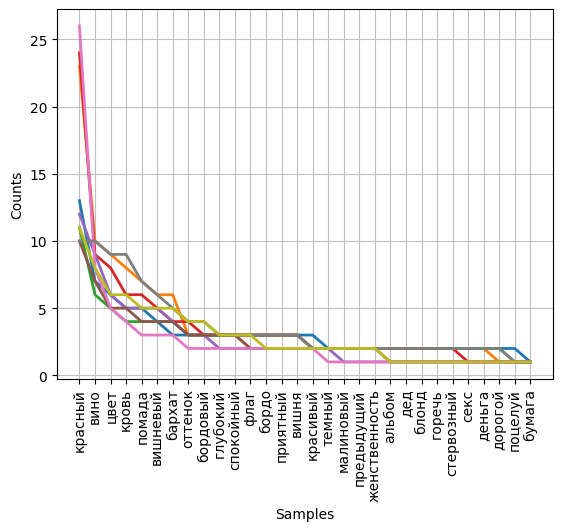

In [75]:
def frequency(nounad):
    fdist = FreqDist(nounad)
    a = fdist.most_common(100)
    b = fdist.plot(30,cumulative=False)
    return a, b

freq1 = frequency(nounadj1)
freq2 = frequency(nounadj2)
freq3 = frequency(nounadj3)
freq4 = frequency(nounadj4)
freq5 = frequency(nounadj5)
freq6 = frequency(nounadj6)
freq7 = frequency(nounadj7)
freq8 = frequency(nounadj8)
freq9 = frequency(nounadj9)

print(freq1)
print(freq2)
print(freq3)
print(freq4)
print(freq5)
print(freq6)
print(freq7)
print(freq8)
print(freq9)


# мб у восприятия цаета есть какаято гендерная история??
 разделим по полам и посмотрим, есть ли разница


In [77]:
def discrimination(column, mf): # mf может быть либо мужской, либо женский
    lst = []
    for i in range(len(scarlet[column])):
        if scarlet['gender'][i] == mf:
            lst.append(list(map(str, scarlet[column][i].split("~"))))
    f = open('/Users/anyamelnikova/Desktop/vs/python/digitallit/output', 'w')
    for  i in range(len(lst)): 
        lst[i] += " "     
        for j in range(len(lst[i])):
            f.writelines(str(lst[i][j]))
    f.close()      
    lst = []
    f = open('/Users/anyamelnikova/Desktop/vs/python/digitallit/output', 'r')
    male = f.readline()          
    tokens = list(tokenize(male))
    doc = Doc(male)
    doc.segment(segmenter)
    doc.tag_morph(morph_tagger)
    for token in doc.tokens:
        if token.pos == "NOUN" or token.pos == 'ADJ':
            token.lemmatize(morph_vocab)
            lst.append(token.lemma) 

    for item in lst:
        if item.isalnum() == False:
            lst.remove(item)
        else:
            item.lower()        
    fdist = FreqDist(lst)
    a = fdist.most_common(100)                  
    return a 



male1 = discrimination('ideas1', "Мужской")
male2 = discrimination('ideas2', "Мужской")
male3 = discrimination('ideas3', "Мужской")
male4 = discrimination('ideas4', "Мужской")
male5 = discrimination('ideas5', "Мужской")
male6 = discrimination('ideas6', "Мужской")
male7 = discrimination('ideas7', "Мужской")
male8 = discrimination('ideas8', "Мужской")
male9 = discrimination('ideas9', "Мужской")
print(male1)
print(male2)
print(male3)
print(male4)
print(male5)
print(male6)
print(male7)
print(male8)
print(male9)
print("\n\n\n")
female1 = discrimination('ideas1', "Женский")
female2 = discrimination('ideas2', "Женский")
female3 = discrimination('ideas3', "Женский")
female4 = discrimination('ideas4', "Женский")
female5 = discrimination('ideas5', "Женский")
female6 = discrimination('ideas6', "Женский")
female7 = discrimination('ideas7', "Женский")
female8 = discrimination('ideas8', "Женский")
female9 = discrimination('ideas9', "Женский")

print(female1)
print(female2)
print(female3)
print(female4)
print(female5)
print(female6)
print(female7)
print(female8)
print(female9)



[('красный', 3), ('ассоциация', 3), ('морковь', 2), ('кирпич', 2), ('помидор', 2), ('кот', 2), ('похожий', 2), ('рамка', 1), ('клубника', 1), ('черепица', 1), ('осень', 1), ('простота', 1), ('энергия', 1), ('арбуз', 1), ('кровавый', 1), ('мэри', 1), ('гниловатый', 1), ('выцветший', 1), ('вывеска', 1), ('оранжевый', 1), ('непонятный', 1), ('хурма', 1), ('спорный', 1), ('занавес', 1), ('бархат', 1), ('персик', 1), ('майка', 1), ('сайт', 1), ('цветовой', 1), ('гамма', 1), ('китайский', 1), ('некачественный', 1), ('краска', 1), ('сам', 1), ('дело', 1), ('одежда', 1), ('теплый', 1), ('вязаный', 1), ('свитер', 1), ('пионерский', 1), ('галстук', 1), ('раздражение', 1), ('цвет', 1), ('художник', 1), ('точнее', 1), ('черный', 1), ('квадрат', 1), ('тик', 1), ('алый', 1), ('рыжий', 1), ('лак', 1), ('подиум', 1), ('мода', 1), ('добавление', 1), ('процент', 1), ('желтый', 1)]
[('кровь', 5), ('красный', 2), ('вино', 2), ('бордовый', 2), ('бархат', 2), ('помада', 2), ('цвет', 2), ('вишня', 1), ('плат

### Эксель для подсчета какой красный самый красный 
_Берем столбцы grade и там делаем =сумм(всех) разлелить на количество_

## Возрастные 

In [45]:
def age_young(column):
    lst = []
    for i in range(len(scarlet[column])):
        if scarlet['age'][i] >= 30:
            lst.append(list(map(str, scarlet[column][i].split("~"))))
    f = open('/Users/anyamelnikova/Desktop/vs/python/digitallit/output', 'w')
    for  i in range(len(lst)): 
        lst[i] += " "     
        for j in range(len(lst[i])):
            f.writelines(str(lst[i][j]))
    f.close()      
    lst = []
    f = open('/Users/anyamelnikova/Desktop/vs/python/digitallit/output', 'r')
    male = f.readline()          
    tokens = list(tokenize(male))
    doc = Doc(male)
    doc.segment(segmenter)
    doc.tag_morph(morph_tagger)
    for token in doc.tokens:
        if token.pos == "NOUN" or token.pos == 'ADJ':
            token.lemmatize(morph_vocab)
            lst.append(token.lemma) 

    for item in lst:
        if item.isalnum() == False:
            lst.remove(item)
        else:
            item.lower()        
    fdist = FreqDist(lst)
    a = fdist.most_common(100)                  
    return a 

def age_old(column):
    lst = []
    for i in range(len(scarlet[column])):
        if scarlet['age'][i] < 30:
            lst.append(list(map(str, scarlet[column][i].split("~"))))
    f = open('/Users/anyamelnikova/Desktop/vs/python/digitallit/output', 'w')
    for  i in range(len(lst)): 
        lst[i] += " "     
        for j in range(len(lst[i])):
            f.writelines(str(lst[i][j]))
    f.close()      
    lst = []
    f = open('/Users/anyamelnikova/Desktop/vs/python/digitallit/output', 'r')
    male = f.readline()          
    tokens = list(tokenize(male))
    doc = Doc(male)
    doc.segment(segmenter)
    doc.tag_morph(morph_tagger)
    for token in doc.tokens:
        if token.pos == "NOUN" or token.pos == 'ADJ':
            token.lemmatize(morph_vocab)
            lst.append(token.lemma) 

    for item in lst:
        if item.isalnum() == False:
            lst.remove(item)
        else:
            item.lower()        
    fdist = FreqDist(lst)
    a = fdist.most_common(100)                  
    return a 




## Эмоции в general


In [78]:
anger = ['злость', 'агрессия', 'агрессивный', 'гнев', 'ярость', 'война']
anxiety = ['опасность', 'нервный', 'тревога']
pain = ["кровь", 'боль', 'смерть', 'умирать',]
love = ['любовь', "страсть", "секс", "сексуальность"]
communism = ['коммунизм', "китай", "ссср"]

def general_emotions(lst):
    ans = []
    answers = []
    for i in range(1, len(scarlet['general'])):
        ans.append(scarlet['general'][i])
    for i in range(len(ans)):
        reply = []
        tokens = list(tokenize(ans[i]))
        doc = Doc(ans[i])
        doc.segment(segmenter)
        doc.tag_morph(morph_tagger)
        for token in doc.tokens:
            if token.pos == "NOUN" or token.pos == 'ADJ':
                token.lemmatize(morph_vocab)
                reply.append(token.lemma) 
        for item in reply:
            if item.isalpha() == False:
                reply.remove(item)
            else:
                item.lower()
        answers.append(reply) 
    count = 0
    for i in range(len(answers)):
        for j in range(len(lst)):
            if lst[j] in answers[i]: 
                count +=1
                break


    return count          

print(general_emotions(anger))
print(general_emotions(anxiety))
print(general_emotions(communism))
print(general_emotions(pain)) 
print(general_emotions(love))


12
13
7
37
15


Сколько людей счмтают какой 

In [ ]:
anger = ['злость', 'агрессия', 'агрессивный', 'гнев', 'ярость', 'война']
anxiety = ['опасность', 'нервный', 'тревога']
pain = ["кровь", 'боль', 'смерть', 'умирать',]
love = ['любовь', "страсть", "секс", "сексуальность"]
communism = ['коммунизм', "китай", "ссср"]
good_f = ['спокойный', 'спокойствие', 'уют', 'хороший', 'достоинство']

def the_emotions(col, lst):
    ans = []
    answers = []
    for i in range(1, len(scarlet[col])):
        ans.append(scarlet[col][i])
    for i in range(len(ans)):
        reply = []
        tokens = list(tokenize(ans[i]))
        doc = Doc(ans[i])
        doc.segment(segmenter)
        doc.tag_morph(morph_tagger)
        for token in doc.tokens:
            if token.pos == "NOUN" or token.pos == 'ADJ':
                token.lemmatize(morph_vocab)
                reply.append(token.lemma) 
        for item in reply:
            if item.isalpha() == False:
                reply.remove(item)
            else:
                item.lower()
        answers.append(reply) 
    count = 0
    for i in range(len(answers)):
        for j in range(len(lst)):
            if lst[j] in answers[i]: 
                count +=1
            break
    return count  

"""

print(the_emotions('ideas1', anger))
print(the_emotions('ideas1', anxiety))
print(the_emotions('ideas1', communism))
print(the_emotions('ideas1', pain)) 
print(the_emotions('ideas1', love))
print(the_emotions('ideas1', love))
print(the_emotions('ideas1', good_f))
print("\n\n\n")

print(the_emotions('ideas2', anger))
print(the_emotions('ideas2', anxiety))
print(the_emotions('ideas2', communism))
print(the_emotions('ideas2', pain)) 
print(the_emotions('ideas2', love))
print(the_emotions('ideas2', love))
print(the_emotions('ideas2', good_f))
print("\n\n\n")

print(the_emotions('ideas3', anger)end)
print(the_emotions('ideas3', anxiety))
print(the_emotions('ideas3', communism))
print(the_emotions('ideas3', pain)) 
print(the_emotions('ideas3', love))
print(the_emotions('ideas3', love))
print(the_emotions('ideas3', good_f))
print("\n\n\n")

print(the_emotions('ideas4', anger))
print(the_emotions('ideas4', anxiety))
print(the_emotions('ideas4', communism))
print(the_emotions('ideas4', pain)) 
print(the_emotions('ideas4', love))
print(the_emotions('ideas4', love))
print(the_emotions('ideas4', good_f))
print("\n\n\n")

print(the_emotions('ideas5', anger))
print(the_emotions('ideas5', anxiety))
print(the_emotions('ideas5', communism))
print(the_emotions('ideas5', pain)) 
print(the_emotions('ideas5', love))
print(the_emotions('ideas5', love))
print(the_emotions('ideas5', good_f))
print("\n\n\n")

print(the_emotions('ideas6', anger))
print(the_emotions('ideas6', anxiety))
print(the_emotions('ideas6', communism))
print(the_emotions('ideas6', pain)) 
print(the_emotions('ideas6', love))
print(the_emotions('ideas6', love))
print(the_emotions('ideas6', good_f))
print("\n\n\n")

print(the_emotions('ideas7', anger))
print(the_emotions('ideas7', anxiety))
print(the_emotions('ideas7', communism))
print(the_emotions('ideas7', pain)) 
print(the_emotions('ideas7', love))
print(the_emotions('ideas7', love))
print(the_emotions('ideas7', good_f))
print("\n\n\n")

print(the_emotions('ideas8', anger))
print(the_emotions('ideas8', anxiety))
print(the_emotions('ideas8', communism))
print(the_emotions('ideas8', pain)) 
print(the_emotions('ideas8', love))
print(the_emotions('ideas8', love))
print(the_emotions('ideas8', good_f))
print("\n\n\n")


print(the_emotions('ideas9', anger))
print(the_emotions('ideas9', anxiety))
print(the_emotions('ideas9', communism))
print(the_emotions('ideas9', pain)) 
print(the_emotions('ideas9', love))
print(the_emotions('ideas9', love))
print(the_emotions('ideas9', good_f))

"""


# Сколько человек какой цвет оценивают на 4 и 5 п прототипичности?

In [81]:
def true_red(col):
    count = 0
    for i in range(len(scarlet[col])):
        if scarlet[col][i] >= 4:
            count += 1
    return count
print(true_red('grade1'))
print(true_red('grade2'))
print(true_red('grade3'))
print(true_red('grade4'))
print(true_red('grade5'))
print(true_red('grade6'))
print(true_red('grade7'))
print(true_red('grade8'))
print(true_red('grade9'))


14
47
5
67
51
40
61
23
32


# Эмоции по полам (провалено)

In [98]:
anger = ['злость', 'агрессия', 'агрессивный', 'гнев', 'ярость', 'война']
anxiety = ['опасность', 'нервный', 'тревога']
pain = ["кровь", 'боль', 'смерть', 'умирать',]
love = ['любовь', "страсть", "секс", "сексуальность"]
communism = ['коммунизм', "китай", "ссср"]
good_f = ['спокойный', 'спокойствие', 'уют', 'хороший', 'достоинство']


ideas = ['ideas1', 'ideas2', 'ideas3', 'ideas4', 'ideas5', 'ideas6', 'ideas7', 'ideas8', 'ideas9',]

genders = ['Мужской', "Женский"]

def mf_emotions(col, lst, mf):
    ans = []
    answers = []
    for i in range(1, len(scarlet[col])):
      if scarlet['gender'][i] == mf:
        ans.append(scarlet[col][i])
    for i in range(len(ans)):
        reply = []
        tokens = list(tokenize(ans[i]))
        doc = Doc(ans[i])
        doc.segment(segmenter)
        doc.tag_morph(morph_tagger)
        for token in doc.tokens:
            if token.pos == "NOUN" or token.pos == 'ADJ':
                token.lemmatize(morph_vocab)
                reply.append(token.lemma)
        for item in reply:
            if item.isalpha() == False:
                reply.remove(item)
            else:
                item.lower()
        answers.append(reply)
    count = 0
    for i in range(len(answers)):
        for j in range(len(lst)):
            if lst[j] in answers[i]:
                count +=1
            break
    return count


def writing():
    f = open('/Users/anyamelnikova/Desktop/vs/python/digitallit/EMOTOINS','w')
    for i in range(len(ideas)):
      lst_male = [ mf_emotions(ideas[i],anger, 'Мужской'), mf_emotions(ideas[i],anxiety, 'Мужской'),mf_emotions(ideas[i],pain, 'Мужской'), mf_emotions(ideas[i],love, 'Мужской'), mf_emotions(ideas[i],anger, 'Мужской'), mf_emotions(ideas[i],anger, 'Мужской')]
      lst_female =[mf_emotions(ideas[i],anger, 'Женский'), mf_emotions(ideas[i],anxiety, 'Женский'),mf_emotions(ideas[i],pain, 'Женский'), mf_emotions(ideas[i],love, 'Женский'), mf_emotions(ideas[i],anger, 'Женский'), mf_emotions(ideas[i],anger, 'Женский')]
      f.write(str(i+1))
      f.writelines("\n")
      f.writelines('Мужской')
      f.write(str(lst_male))
      f.write('\n')
      f.write('Женский')
      f.write(str(lst_female))
      f.write('\n\n\n')

